In [37]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [57]:
r = re.compile('\s*Matches of size (0x[0-9a-fA-F]+) have (\d+) instances taking (0x[0-9a-fA-F]+)')

In [68]:
sizes = []
counts = []
totals = []

with open('sx_huge.core.summarize_used_%VectorBody') as fd:
    for line in fd:
        m = r.match(line)
        if m:
            g = m.groups()
            sizes.append(int(g[0], base=16))
            counts.append(int(g[1]))
            totals.append(int(g[2], base=16))
sizes = np.array(sizes)
counts = np.array(counts)
totals = np.array(totals)

idx = np.argsort(sizes)
sizes = sizes[idx]
counts = counts[idx]
totals = totals[idx]

In [69]:
assert (sizes * counts == totals).all()

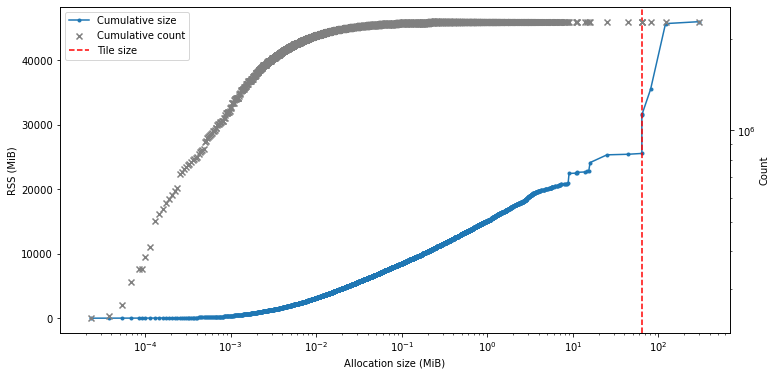

In [114]:
fig, ax = plt.subplots(figsize=(12, 6))
lns1 = ax.plot(sizes/1024/1024, totals.cumsum()/1024/1024, marker='.', label='Cumulative size')
lnst = ax.axvline(64, c='red', linestyle='--', label='Tile size')
ax.set_xlabel('Allocation size (MiB)')
ax.set_ylabel('RSS (MiB)')
ax.set_xscale('log')

ax2 = ax.twinx()
lns2 = ax2.scatter(sizes/1024/1024, counts.cumsum(), color='gray', marker='x', label='Cumulative count')
ax2.set_yscale('log')
ax2.set_ylabel('Count')

lns = lns1+[lns2,lnst]
ax.legend(lns, [l.get_label() for l in lns])
plt.show()

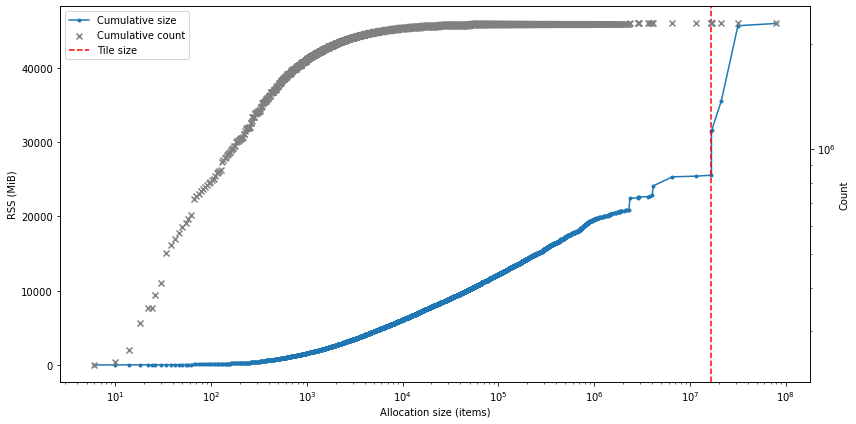

In [121]:
fig, ax = plt.subplots(figsize=(12, 6))
lns1 = ax.plot(sizes/4, totals.cumsum()/1024/1024, marker='.', label='Cumulative size')
lnst = ax.axvline(4096**2, c='red', linestyle='--', label='Tile size')
ax.set_xlabel('Allocation size (items)')
ax.set_ylabel('RSS (MiB)')
ax.set_xscale('log')

ax2 = ax.twinx()
lns2 = ax2.scatter(sizes/4, counts.cumsum(), color='gray', marker='x', label='Cumulative count')
ax2.set_yscale('log')
ax2.set_ylabel('Count')

lns = lns1+[lns2,lnst]
ax.legend(lns, [l.get_label() for l in lns])
plt.tight_layout()

fig.savefig('/home/aalvarez/Downloads/rss_vector.png')

In [155]:
bytotal = np.flip(totals.argsort())
for i in bytotal[:100]:
    print(f'{totals[i] / 1024**3:.2f} GiB')
    print(f'\t({sizes[i]:x}) {sizes[i]/1024**2:.2f} MiB x {counts[i]}')

9.93 GiB
	(790bff0) 121.05 MiB x 84
5.81 GiB
	(4000ff0) 64.00 MiB x 93
3.80 GiB
	(5109ff0) 81.04 MiB x 48
1.51 GiB
	(903008) 9.01 MiB x 172
1.27 GiB
	(fe0108) 15.88 MiB x 82
1.17 GiB
	(1905008) 25.02 MiB x 48
0.29 GiB
	(12c00ff0) 300.00 MiB x 1
0.14 GiB
	(2f5f88) 2.96 MiB x 48
0.13 GiB
	(4060ff0) 64.38 MiB x 2
0.13 GiB
	(4000008) 64.00 MiB x 2
0.09 GiB
	(2c00ff0) 44.00 MiB x 2
0.08 GiB
	(1ba508) 1.73 MiB x 48
0.07 GiB
	(f52d18) 15.32 MiB x 5
0.07 GiB
	(e9d698) 14.61 MiB x 5
0.07 GiB
	(1fba88) 1.98 MiB x 36
0.07 GiB
	(ded758) 13.93 MiB x 5
0.06 GiB
	(2dab08) 2.85 MiB x 22
0.05 GiB
	(b172f8) 11.09 MiB x 5
0.05 GiB
	(b099e8) 11.04 MiB x 5
0.05 GiB
	(1008) 0.00 MiB x 14073
0.05 GiB
	(aff868) 11.00 MiB x 5
0.05 GiB
	(11c3d8) 1.11 MiB x 48
0.04 GiB
	(81a758) 8.10 MiB x 5
0.04 GiB
	(558) 0.00 MiB x 28280
0.04 GiB
	(752ed8) 7.32 MiB x 5
0.04 GiB
	(73eea8) 7.25 MiB x 5
0.03 GiB
	(71c498) 7.11 MiB x 5
0.03 GiB
	(6f49c8) 6.96 MiB x 5
0.03 GiB
	(6da888) 6.85 MiB x 5
0.03 GiB
	(889888) 8.54 MiB x 4